## Preâmbulo
### Importações e afins

gabriel macedo nunes pontes
98877

In [2]:
%matplotlib inline

from PIL import Image
import numpy as np
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

### Arquivo de entrada e geração da imagem

In [15]:
arquivo = 'rio_cinza.jpg'

if os.path.isfile(arquivo):
    img = Image.open(arquivo)
    if img.mode == 'RGB':
        img_cinza = img.convert('L')
    else:
        img_cinza = img
        img = img_cinza.convert('RGB')
    f = np.asarray(img)
    f_cinza = np.asarray(img_cinza)
else:
    print('Arquivo inexistente. Reexecute a célula, informando um arquivo correto')

#### Se desejar visualizar as imagens, execute a célula abaixo

In [19]:
img.show()
img_cinza.show()

### Declarações de funções
#### Geração de Histogramas

In [6]:
def histograma(f, L):
    h = np.zeros(L)
    
    for k in range(L):
        h[k] = np.sum(f == k)
    
    # O laço acima equivale a:
    #for y in range(f.shape[0]):
    #    for x in range(f.shape[1]):
    #        k = int(f[y,x])
    #        h[k] += 1
        
    return h

def calcula_cdf(p):
    cdf = np.zeros(p.shape)
    
    for k in range(len(p)):
        cdf[k] = np.sum(p[:k+1])
        
    return cdf

def gera_histogramas(f, L):
    # Contagem de pixels da imagem
    n = f.shape[0] * f.shape[1]
    
    h = histograma(f, L)
    p = h / n
    cdf = calcula_cdf(p)

    return h,p,cdf
    
def histogramas(f, Lmax=255):
    # Contagem do número de tons:
    L = Lmax + 1
    
    # identifica o tipo de imagem
    if len(f.shape) < 3:
        # Imagem cinza
        return gera_histogramas(f, L)
    else:
        # Imagem RGB
        hr,pr,cdfr = gera_histogramas(f[:,:,0], L)
        hg,pg,cdfg = gera_histogramas(f[:,:,1], L)
        hb,pb,cdfb = gera_histogramas(f[:,:,2], L)
        
        return (hr,hg,hb), (pr,pg,pb), (cdfr, cdfg, cdfb)

#### Exibição de histogramas

In [7]:
def plota_histogramas(h1, h2, h3, titulo='Histogramas para a imagem', tipos=['h','p','c'],
                      escala_log=[False, False, False]):
    tipos_padrao = {
        'h': 'Contagem de pixels',
        'p': 'Probabilidade de ocorrência',
        'c': 'Probabilidade Acumulada de ocorrência'
        }
    for tipo in tipos:
        if tipo not in tipos_padrao.keys():
            msg = 'Tipo %s inválido. Deve ser um entre:\n' % tipo
            for t in tipos:
                msg += '\t' + t + ' --> ' + tipos[t] + '\n'

            raise Exception(msg)
    
    
    fig = plt.figure(figsize=(20, 4))
    fig.suptitle(titulo)
    
    k = np.array(list(range(len(h1))))
    
    # Histograma de Distribuição
    ax = fig.add_subplot(1, 3, 1)
    ax.bar(k, h1)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[0]])
    if escala_log[0]:
        ax.set_yscale('log')
    ax.grid(True)
    
    # Histograma de Probabilidade
    ax = fig.add_subplot(1, 3, 2)
    ax.bar(k, h2)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[1]])
    if escala_log[1]:
        ax.set_yscale('log')
    ax.grid(True)
    
    # Histograma de Distribuição
    ax = fig.add_subplot(1, 3, 3)
    ax.bar(k, h3)
    ax.set_xlim(0,255)
    ax.set_ylabel(tipos_padrao[tipos[2]])
    if escala_log[2]:
        ax.set_yscale('log')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
def plota_individual(h, titulo, tipo='h', escala_log=False):
    tipos = {
        'h': 'Contagem de pixels',
        'p': 'Probabilidade de ocorrência',
        'c': 'Probabilidade Acumulada de ocorrência'
        }
    if tipo not in tipos.keys():
        msg = 'Tipo %s inválido. Deve ser um entre:\n' % tipo
        for t in tipos:
            msg += '\t' + t + ' --> ' + tipos[t] + '\n'
            
        raise Exception(msg)
    
    fig = plt.figure()
    fig.suptitle(titulo)
    
    k = np.array(list(range(len(h))))
    
    # Plota histograma
    plt.bar(k, h)
    plt.xlim(0,255)
    plt.ylabel(tipos[tipo])
    plt.grid(True)
    if escala_log:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [ ]:
h,p,cdf = histogramas(f_cinza)
#plota_histogramas(h,p,cdf)
#plota_histogramas(h,p,cdf,escala_log=[False, True, False])

plota_individual(p, 'Histograma Monocromático', tipo='p')

In [ ]:
H,P,CDF = histogramas(f)

plota_histogramas(H[0],H[1],H[2],titulo='Histogramas R, G, e B para a imagem', tipos=['h','h','h'])

In [ ]:
f_lin = np.reshape(f_cinza, f.shape[0]*f.shape[1])

sns.histplot(f_lin, stat='probability', cumulative=True)
plt.show()

## Equalização de Histogramas
### Para imagens coloridas RGB:

In [9]:
# Parâmetro inicial
Lmax = 255

# Obtem histogramas de f
H,P,CDF = histogramas(f)
CDF = np.array(CDF)

# Incializa variáveis
L = Lmax + 1
s=np.zeros((3,L),np.uint8)
# Equaliza
for k in range(0,L):
    s[:,k]=np.uint8(np.round(Lmax*CDF[:,k]))
# Aplica
imgEq=img.copy()
for y in range (imgEq.height):
    for x in range(imgEq.width):
        r,g,b=imgEq.getpixel((x,y))
        r=s[0,r]
        g=s[1,g]
        b=s[2,b]
        imgEq.putpixel((x,y),(r,g,b))
        
# Exibe
img.show()
imgEq.show()

## Especificação direta de histograma
### Para imagens RGB:

#### Arquivo de estilo

In [38]:
arquivo_estilo = 'antiga02.jpg'

if os.path.isfile(arquivo_estilo):
    # Objeto Image + array da imagem original
    imgEstilo = Image.open(arquivo_estilo)
    g = np.asarray(imgEstilo)
    # Objeto Image + array da imagem convertida para tons de cinza
    imgEstilo_cinza = imgEstilo.convert('L')
    g_cinza = np.asarray(imgEstilo_cinza)
else:
    print('Arquivo inexistente. Reexecute a célula, informando um arquivo correto')
# Parâmetro inicial
Lmax = 255

# Obtem histogramas de f e g
H,P,CDF = histogramas(f)
CDFf = np.array(CDF)
H,P,CDF = histogramas(g)
CDFg = np.array(CDF)

# Pareamento
mapa=np.zeros((3,Lmax+1),dtype=np.uint8)
for k in range (Lmax+1):
    for canal in range(3):
        dist=np.abs(CDFf[canal,k]-CDFg[canal,:])
        mapa[canal,k]=np.argmin(dist)

imgEspec=img.copy()
for y in range (imgEspec.height):
    for x in range(imgEspec.width):
        r,g1,b=imgEspec.getpixel((x,y))
        R=mapa[0,r]
        G=mapa[1,g1]
        B=mapa[2,b]
        imgEspec.putpixel((x,y),(R,G,B))
img.show()
imgEstilo.show()
imgEspec.show()

## Alargamento de contraste

In [11]:
# Implementação
n=np.empty(f.shape)
for canal in range(3):
    n[:,:,canal]=((f[:,:,canal]-np.min(f[:,:,canal]))/(np.max(f[:,:,canal])-np.min(f[:,:,canal])))*Lmax
imgAlarg=Image.fromarray(np.uint8(np.round(n)))
img.show()
imgAlarg.show()

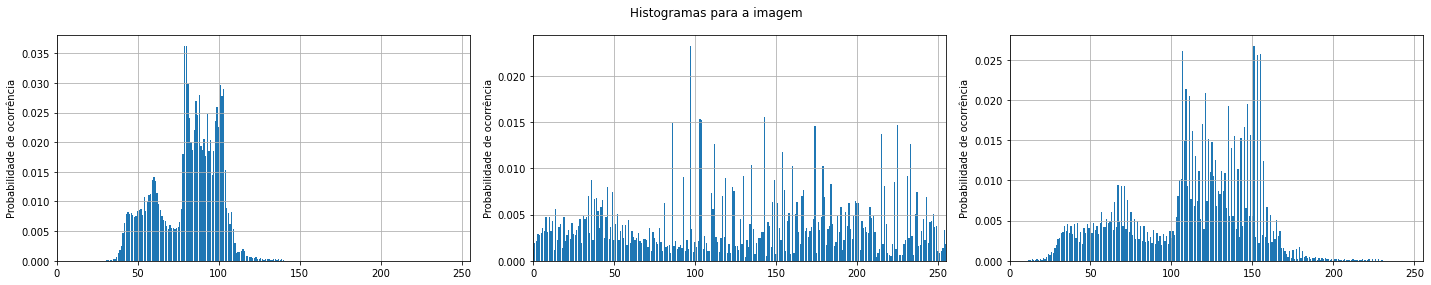

In [12]:
imgEqc = imgEq.convert('L')
imgAlargc = imgAlarg.convert('L')

_,p1,__ = histogramas(np.asarray(img_cinza))
_,p2,__ = histogramas(np.asarray(imgEqc))
_,p3,__ = histogramas(np.asarray(imgAlargc))

plota_histogramas(p1, p2, p3, titulo='Histogramas para a imagem', tipos=['p', 'p', 'p'])